Final Project Check-in 2018-11-16
------

Group Name
-----
Project Impossible

Student Names
----

1. Yuhan Wang
2. Byron Han
3. Jinghui Zhao
4. Liying Li
5. Shulun Chen

Load Data
-----

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [36]:
talking = pd.read_csv('talking.csv', parse_dates = ['click_time'])

### Data Overview
------
Columns:

• ip: ip address of click

• app: app id for marketing

• device: device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.)

• os: os version id of user mobile phone

• channel: channel id of mobile ad publisher

• click_time: timestamp of click (UTC)

• attributed_time: if user download the app for after clicking an ad, this is the time of the app download

• is_attributed: the target that is to be predicted, indicating the app was downloaded

In [37]:
# number of rows
len(talking)

184903890

In [38]:
talking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184903890 entries, 0 to 184903889
Data columns (total 8 columns):
ip                 int64
app                int64
device             int64
os                 int64
channel            int64
click_time         datetime64[ns]
attributed_time    object
is_attributed      int64
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 11.0+ GB


In [39]:
talking.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0


In [40]:
talking.tail()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
184903885,121312,12,1,10,340,2017-11-09 16:00:00,NaN,0
184903886,46894,3,1,19,211,2017-11-09 16:00:00,NaN,0
184903887,320126,1,1,13,274,2017-11-09 16:00:00,NaN,0
184903888,189286,12,1,37,259,2017-11-09 16:00:00,NaN,0
184903889,106485,11,1,19,137,2017-11-09 16:00:00,NaN,0


In [41]:
talking.sample(5)  # ummm... wierd, is_attributed always 0?

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
123635662,333473,12,1,19,340,2017-11-08 16:34:41,NaN,0
166856116,88911,2,1,13,435,2017-11-09 10:34:34,NaN,0
77586606,131991,9,1,8,215,2017-11-08 02:36:08,NaN,0
130534557,30587,9,1,19,134,2017-11-08 23:28:44,NaN,0
44656566,138871,2,1,19,237,2017-11-07 11:05:58,NaN,0


### Imbalanced dataset

In [42]:
num_attributed_time = talking['is_attributed'].value_counts()

In [43]:
num_attributed_time

0    184447044
1       456846
Name: is_attributed, dtype: int64

In [44]:
# extremely imbalanced data, we may need to resample the data in the training stage
print('is_attributed==0 weight: %.4f%%' % (num_attributed_time[0]/sum(num_attributed_time)*100))
print('is_attributed==1 weight: %.4f%%' % (num_attributed_time[1]/sum(num_attributed_time)*100))

is_attributed==0 weight: 99.7529%
is_attributed==1 weight: 0.2471%


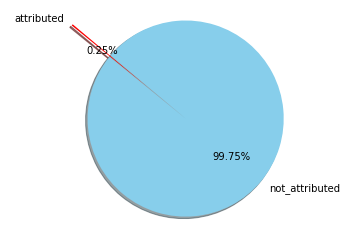

In [114]:
# visualize the imbalance: extremely imbalanced
labels = 'attributed', 'not_attributed'
sizes = [num_attributed_time[1], num_attributed_time[0]]
colors = ['red', 'skyblue']
explode = (0.5, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

### Preprocess Raw Features

In [45]:
# transform click_time into day, hour, minute and second
talking['day'] = talking['click_time'].dt.day
talking['hour'] = talking['click_time'].dt.hour
talking['minute'] = talking['click_time'].dt.minute
talking['second'] = talking['click_time'].dt.second
talking.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute,second
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0,6,14,32,21
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0,6,14,33,34
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0,6,14,34,12
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0,6,14,34,52
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0,6,14,35,8


In [46]:
# ip, app, device, os, channel, is_attributed and the time features we just created
# are encoded to be integers, we tranform them into categorical data
heads = talking.columns
print(heads)
for i in list(range(0,5)) + list(range(-1, -6, -1)):
    talking[heads[i]] = talking[heads[i]].astype('category')
talking.info()

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',
       'is_attributed', 'day', 'hour', 'minute', 'second'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184903890 entries, 0 to 184903889
Data columns (total 12 columns):
ip                 category
app                category
device             category
os                 category
channel            category
click_time         datetime64[ns]
attributed_time    object
is_attributed      category
day                category
hour               category
minute             category
second             category
dtypes: category(10), datetime64[ns](1), object(1)
memory usage: 5.7+ GB


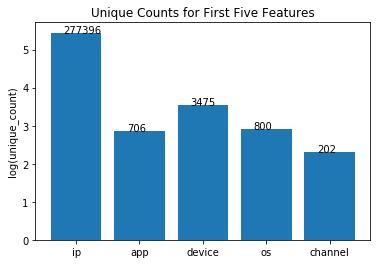

In [47]:
# visualize number of unique values for each categorical feature
x = np.arange(1, 6)
unique = [len(talking[i].unique()) for i in heads[:5]]
y = np.array([math.log(i, 10) for i in unique])
plt.bar(x, y)
for i, v in enumerate(unique):
    plt.text(i + .8, math.log(v, 10), str(v))

plt.ylabel('log(unique_count)')
plt.xticks(np.arange(1,6), ('ip', 'app', 'device', 'os', 'channel'))
plt.title('Unique Counts for First Five Features')
plt.show()

### Data Down-sampling

In [48]:
attr0 = talking[talking['is_attributed']==0]
attr1 = talking[talking['is_attributed']==1]

In [82]:
subsample1 = attr0.sample(n=num_attributed_time[1], random_state=3)
subsample2 = attr0.sample(n=num_attributed_time[1], random_state=7)
subsample3 = attr0.sample(n=num_attributed_time[1], random_state=37)

In [83]:
# sub-dataset 1
talking1 = pd.concat([attr1, subsample1])
# sub-dataset 2
talking2 = pd.concat([attr1, subsample2])
# sub-dataset 3
talking3 = pd.concat([attr1, subsample3])

In [84]:
# Well done! Balanced data now!
print(talking1['is_attributed'].value_counts())
print(talking2['is_attributed'].value_counts())
print(talking3['is_attributed'].value_counts())

1    456846
0    456846
Name: is_attributed, dtype: int64
1    456846
0    456846
Name: is_attributed, dtype: int64
1    456846
0    456846
Name: is_attributed, dtype: int64


In [85]:
# save training set into .csv files to avoid loading original huge dataset
talking1.to_csv('talking1.csv')
talking2.to_csv('talking2.csv')
talking3.to_csv('talking3.csv')

In [28]:
# load training set directly
# talking1 = pd.read_csv('talking1.csv', parse_dates = ['click_time'])
# talking2 = pd.read_csv('talking2.csv', parse_dates = ['click_time'])
# talking3 = pd.read_csv('talking3.csv', parse_dates = ['click_time'])

Fit scikit-learn model
----

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

### Fit 3 Subsamples

In [86]:
# subsample 1
x1 = talking1.iloc[:, [0,1,2,3,4,-4,-3,-2,-1]]
y1 = talking1.is_attributed
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(x1, y1, test_size=0.3, random_state=42)

In [88]:
# subsample 2
x2 = talking2.iloc[:, [0,1,2,3,4,-4,-3,-2,-1]]
y2 = talking2.is_attributed
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x2, y2, test_size=0.3, random_state=42)

In [90]:
# subsample 3
x3 = talking3.iloc[:, [0,1,2,3,4,-4,-3,-2,-1]]
y3 = talking3.is_attributed
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(x3, y3, test_size=0.3, random_state=42)

In [102]:
# K-NN
knn = neighbors.KNeighborsClassifier()
knn_1 = knn.fit(X_train_1, y_train_1)
knn_2 = knn.fit(X_train_2, y_train_2)
knn_3 = knn.fit(X_train_3, y_train_3)

# Logistic Regression
logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000,
                                           multi_class='multinomial')
lr_1 = logistic.fit(X_train_1, y_train_1)
lr_2 = logistic.fit(X_train_2, y_train_2)
lr_3 = logistic.fit(X_train_3, y_train_3)


# Guassian Naive Bayes
gnb = GaussianNB()
gnb_1 = gnb.fit(X_train_1, y_train_1)
gnb_2 = gnb.fit(X_train_2, y_train_2)
gnb_3 = gnb.fit(X_train_3, y_train_3)


# Support Vector Classifier
svc = LinearSVC(C=1.0)
svc_1 = svc.fit(X_train_1, y_train_1)
svc_2 = svc.fit(X_train_2, y_train_2)
svc_3 = svc.fit(X_train_3, y_train_3)


# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100)
rfc_1 = rfc.fit(X_train_1, y_train_1)
rfc_2 = rfc.fit(X_train_2, y_train_2)
rfc_3 = rfc.fit(X_train_3, y_train_3)

/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Evaluation Metric
----

### Subsample 1

In [103]:
knn_1_score = knn_1.score(X_test_1, y_test_1)
lr_1_score = lr_1.score(X_test_1, y_test_1)
gnb_1_score = gnb_1.score(X_test_1, y_test_1)
svc_1_score = svc_1.score(X_test_1, y_test_1)
rfc_1_score = rfc_1.score(X_test_1, y_test_1)

print('KNN score: %f' % knn_1_score)
print('LogisticRegression score: %f' % lr_1_score)
print('gnb score: %f' % gnb_1_score)
print('svc score: %f' % svc_1_score)
print('rfc score: %f' % rfc_1_score)

KNN score: 0.809984
LogisticRegression score: 0.752131
gnb score: 0.747658
svc score: 0.505454
rfc score: 0.920918


### Subsample 2

In [104]:
knn_2_score = knn_2.score(X_test_2, y_test_2)
lr_2_score = lr_2.score(X_test_2, y_test_2)
gnb_2_score = gnb_2.score(X_test_2, y_test_2)
svc_2_score = svc_2.score(X_test_2, y_test_2)
rfc_2_score = rfc_2.score(X_test_2, y_test_2)

print('KNN score: %f' % knn_2_score)
print('LogisticRegression score: %f' % lr_2_score)
print('gnb score: %f' % gnb_2_score)
print('svc score: %f' % svc_2_score)
print('rfc score: %f' % rfc_2_score)

KNN score: 0.810057
LogisticRegression score: 0.752069
gnb score: 0.747180
svc score: 0.505866
rfc score: 0.920400


### Subsample 3

In [105]:
knn_3_score = knn_3.score(X_test_3, y_test_3)
lr_3_score = lr_3.score(X_test_3, y_test_3)
gnb_3_score = gnb_3.score(X_test_3, y_test_3)
svc_3_score = svc_3.score(X_test_3, y_test_3)
rfc_3_score = rfc_3.score(X_test_3, y_test_3)

print('KNN score: %f' % knn_3_score)
print('LogisticRegression score: %f' % lr_3_score)
print('gnb score: %f' % gnb_3_score)
print('svc score: %f' % svc_3_score)
print('rfc score: %f' % rfc_3_score)

KNN score: 0.809721
LogisticRegression score: 0.752966
gnb score: 0.747282
svc score: 0.505870
rfc score: 0.920721


### Average Score

In [107]:
print('Average KNN score: %f' % ((knn_1_score + knn_2_score + knn_3_score) / 3))
print('Average LogisticRegression score: %f' % ((lr_1_score + lr_2_score + lr_3_score) / 3))
print('Average Gaussian Naive Bayes score: %f' % ((gnb_1_score + gnb_2_score + gnb_3_score) / 3))
print('Average SVC score: %f' % ((svc_1_score + svc_2_score + svc_3_score) / 3))
print('Average RFC score: %f' % ((rfc_1_score + rfc_2_score + rfc_3_score) / 3))

Average KNN score: 0.809920
Average LogisticRegression score: 0.752388
Average Gaussian Naive Bayes score: 0.747373
Average SVC score: 0.505730
Average RFC score: 0.920680
